### 손글씨 숫자 이미지 데이터(MNIST)를 이용해서 숫자를 인식

(1) 문제정의
- keras를 이용해서 손글씨 숫자 이미지 인식 신경망을 설계하고 학습

In [1]:
!pip install "astunparse==1.6.3"

(2) 데이터 수집

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

(3) 데이터 전처리
(4) 데이터 탐색/시각화

In [4]:
#데이터 크기
train_images.shape,train_labels.shape
#특성의 수 : 28*28=784개의 특성

((60000, 28, 28), (60000,))

In [5]:
test_images.shape,test_labels.shape

((10000, 28, 28), (10000,))

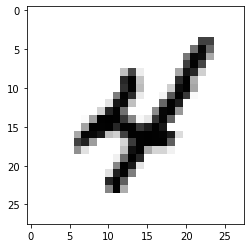

In [6]:
#이미지 데이터 시각화
import matplotlib.pyplot as plt

digit=train_images[9]

#cmap=plt.cm.binary: 색상을 흑백으로 출력
plt.imshow(digit, cmap=plt.cm.binary)

In [7]:
#이미지를 사용하려면 2차원 이미지 데이터를 1차원으로 변환
train_images=train_images.reshape((60000,28*28))
test_images=test_images.reshape((10000,28*28))

train_images.shape,test_images.shape

((60000, 784), (10000, 784))

In [8]:
train_images[9]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 189, 190,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 143, 247, 153,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [9]:
#이미지의 픽셀값은 0-255로 구성 
#기계는 0과 1사이값으로 된 숫자로 변환해주는 것이 좋음(가장 큰 값으로 나눔)
train_images=train_images.astype("float32")/255
test_images=test_images.astype("float32")/255

In [10]:
train_images[9]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
train_labels.shape,test_labels.shape

((60000,), (10000,))

In [12]:
import pandas as pd
#다중분류(10개)
# 라벨을 원핫 인코딩
train_labels_en=pd.get_dummies(train_labels)
test_labels_en=pd.get_dummies(test_labels)
train_labels_en.shape,test_labels_en.shape

((60000, 10), (10000, 10))

(5) 신경망 설계

In [13]:
#초기화를 위한 seed 설정
import numpy as np
import tensorflow as tf

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

In [14]:
#신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
#입력층
model.add(Dense(1568,input_dim=784,activation="relu"))
#은닉층
model.add(Dense(3136,activation="relu"))
#출력층
model.add(Dense(10,activation="softmax"))
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["acc"])


In [15]:
model.fit(train_images,train_labels_en,epochs=5,batch_size=128)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
469/469 [==============================] - 2s 3ms/step - loss: 0.1742 - acc: 0.9463
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0699 - acc: 0.9781
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0514 - acc: 0.9838
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0356 - acc: 0.9888
Ep

In [16]:
model.evaluate(test_images,test_labels_en)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 0s 1ms/step - loss: 0.0753 - acc: 0.9793


[0.07534349709749222, 0.9793000221252441]

In [17]:
model2=Sequential()
#입력층
model2.add(Dense(1568,input_dim=784,activation="relu"))
#은닉층
model2.add(Dense(3136,activation="relu"))
#출력층
model2.add(Dense(10,activation="softmax"))
model2.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["acc"])

In [18]:
model2.fit(train_images,train_labels_en,epochs=5,batch_size=128)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
469/469 [==============================] - 2s 4ms/step - loss: 0.2228 - acc: 0.9336
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0905 - acc: 0.9742
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0644 - acc: 0.9819
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0516 - acc: 0.9862
Ep

In [19]:
model2.evaluate(test_images,test_labels_en)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 0s 1ms/step - loss: 0.1109 - acc: 0.9784


[0.11093610525131226, 0.9783999919891357]

(7) 평가 / 예측

In [20]:
print("훈련 정확도 : ",model.evaluate(train_images, train_labels_en))
print("테스트 정확도 : ",model.evaluate(test_images, test_labels_en))

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0207 - acc: 0.9934
훈련 정확도 :  [0.0207159873098135, 0.993399977684021]
313/313 [==============================] - 0s 1ms/step - loss: 0.0753 - acc: 0.9793
테스트 정확도 :  [0.07534349709749222, 0.9793000221252441]


In [21]:
pred=model.predict(test_images[2:3]) #1
print(pred)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[2.3646590e-08 9.9997354e-01 2.4100278e-05 8.7955571e-10 4.0801785e-07
  2.7294948e-07 4.9190919e-07 7.9191278e-07 4.1319336e-07 7.8111402e-09]]


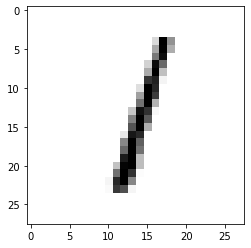

In [22]:
digit=test_images[2].reshape(28,28)

#cmap=plt.cm.binary: 색상을 흑백으로 출력
plt.imshow(digit, cmap=plt.cm.binary)

In [23]:
import PIL.Image as pimg
import numpy as np

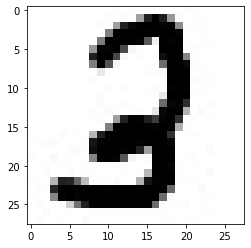

In [24]:
img=pimg.open("./data/3.jpg").convert("L")#흑백으로 바꾸기
plt.imshow(img,cmap="gray")

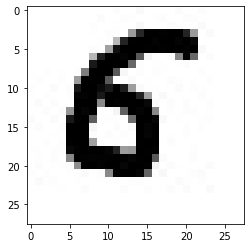

In [25]:
img2=pimg.open("./data/6.jpg").convert("L")#흑백으로 바꾸기
plt.imshow(img2,cmap="gray")

In [26]:
#이미지 타입을 numpy 배열로 변환
num=np.array(img)
num.shape

(28, 28)

In [27]:
num2=np.array(img2)
num2.shape

(28, 28)

In [28]:
# 검정색이 0이므로 숫자부분이 0으로 표현
# 기존데이터에는 숫자부분이 흰색(255)로 되어있음
# 숫자부분을 0에서 255로 변환 필요
num

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 255,
        254, 255, 254, 255, 255, 255, 255, 252, 254, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 255, 251,
        253, 161,  32,   1,  28, 151, 251, 255, 255, 252, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 255, 158,  32,
          6,   0,   0,   0,   5,   0, 140, 254, 253, 255, 254, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 128,   0,   1,
          0,   0,   2,   0,   0,   0,   6, 255, 255, 253, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 124,   0,   2,   2,
          0,   4,  88, 240,   0,   3,   0, 254, 255, 255, 253, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 151,   3,   3,   0,  72,
        247, 253, 255, 255,   0,   0,   1, 255, 252, 254, 255, 255, 255,
        255, 255],
       [25

In [29]:
num=255-num
num

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          1,   0,   1,   0,   0,   0,   0,   3,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   4,
          2,  94, 223, 254, 227, 104,   4,   0,   0,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  97, 223,
        249, 255, 255, 255, 250, 255, 115,   1,   2,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 127, 255, 254,
        255, 255, 253, 255, 255, 255, 249,   0,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 131, 255, 253, 253,
        255, 251, 167,  15, 255, 252, 255,   1,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 104, 252, 252, 255, 183,
          8,   2,   0,   0, 255, 255, 254,   0,   3,   1,   0,   0,   0,
          0,   0],
       [  

In [30]:
num2=255-num2

In [31]:
# 작성한 숫자데이터 훈련했던 데이터와 동일하게 변환(크기:1차원, 값범위 :0~1)
test_num=num.reshape(1,28*28)
test_num2=num2.reshape(1,28*28)
test_num=test_num.astype("float32")/255
test_num2=test_num2.astype("float32")/255

In [32]:
test_num.shape

(1, 784)

In [33]:
pred=model.predict(test_num)
pred

array([[2.6296534e-19, 1.0146954e-13, 3.8192763e-08, 1.0000000e+00,
        3.8440494e-24, 1.6774550e-13, 2.5812011e-20, 6.5964734e-12,
        4.7946141e-08, 5.9510993e-17]], dtype=float32)

In [34]:
pred2=model.predict(test_num2)
pred2

array([[2.0115242e-07, 4.0832583e-06, 1.2867973e-07, 3.7152984e-07,
        4.1860079e-07, 2.3025563e-01, 7.5755543e-01, 6.7900726e-07,
        1.2140083e-02, 4.2924468e-05]], dtype=float32)

In [35]:
import tensorflow as tf

CNN을 이용해서 손글씨 숫자 인식하기

In [37]:
import numpy as np
import tensorflow as tf
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

In [38]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [39]:
X_train.shape[0]

60000

In [40]:
#훈련데이터 1000개, 테스트데이터 300개
X_train=X_train[:1000,:]
y_train=y_train[:1000,]
X_test=X_test[:300,:]
y_test=y_test[:300,]

In [41]:
X_train.shape[0],X_test.shape[0]

(1000, 300)

In [42]:
import pandas as pd

#2차원 데이터에 색상 차원을 추가(흑백 1차원,칼라 3차원)
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

#0-255범위의 픽셀값을 0~1사이 범위로 변경
X_train=X_train.astype("float32")/255
X_test=X_test.astype("float32")/255

#다중분류이므로 원핫 인코딩
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

y_train.shape,y_test.shape

((1000, 10), (300, 10))

입력층에 CNN을 추가해서 학습모델 설계

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten

cnn_model=Sequential()

#입력층(CNN층)
#filters : 필터의 수, 출력의 수 (출력되는 이미지의 개수)
#kernel_size : 필터의 크기 (3,3) (5,5) (7,7)
#input_shape : 입력데이터의 크기(2차원 이상인 경우에 사용)
#padding : converlution 연산때문에 작아지는 이미지 크기를 유지할 것인지 여부
#          (same-항상 같은 크기로 이미지를 유지,
#           valid-컨벌루션으로 줄어든 상태를 그대로 유지)
cnn_model.add(Conv2D(filters=32,
                    kernel_size=(3,3),
                    input_shape=(28,28,1),
                    padding="valid",
                    activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
#pool_size : 이미지를 얼마나 줄일 것인지를 설정

#은닉층 넣기 전에 이전 데이터들을 1차원으로 변환
cnn_model.add(Flatten())
#은닉층
cnn_model.add(Dense(units=128,activation="relu"))
#출력층
cnn_model.add(Dense(units=10,activation="softmax"))

cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [48]:
cnn_model.compile(loss="categorical_crossentropy",
                 optimizer="adam",
                 metrics=["acc"])

In [50]:
cnn_model.fit(X_train,y_train,epochs=10,batch_size=20,
             validation_data=(X_test,y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
37/50 [=====================>........] - ETA: 0s - loss: 1.1683 - acc: 0.6622WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001592EC96620> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and a

In [61]:
cnn_model2=Sequential()

#입력층(CNN층)
#filters : 필터의 수, 출력의 수 (출력되는 이미지의 개수)
#kernel_size : 필터의 크기 (3,3) (5,5) (7,7)
#input_shape : 입력데이터의 크기(2차원 이상인 경우에 사용)
#padding : converlution 연산때문에 작아지는 이미지 크기를 유지할 것인지 여부
#          (same-항상 같은 크기로 이미지를 유지,
#           valid-컨벌루션으로 줄어든 상태를 그대로 유지)
cnn_model2.add(Conv2D(filters=32,
                    kernel_size=(3,3),
                    input_shape=(28,28,1),
                    padding="valid",
                    activation="relu"))
cnn_model2.add(MaxPooling2D(pool_size=(2,2)))
#pool_size : 이미지를 얼마나 줄일 것인지를 설정

#은닉층 넣기 전에 이전 데이터들을 1차원으로 변환
cnn_model2.add(Flatten())
#은닉층
cnn_model2.add(Dense(units=128,activation="relu"))
cnn_model2.add(Dropout(0.2))
cnn_model2.add(Dense(units=256,activation="relu"))
#출력층
cnn_model2.add(Dense(units=10,activation="softmax"))

cnn_model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               692352    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [62]:
cnn_model2.compile(loss="categorical_crossentropy",
                 optimizer="adam",
                 metrics=["acc"])

In [63]:
h=cnn_model2.fit(X_train,y_train,epochs=10,batch_size=20,
             validation_data=(X_test,y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
33/50 [==================>...........] - ETA: 0s - loss: 1.5047 - acc: 0.5470WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001593083FEA0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and a

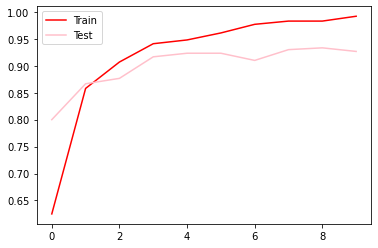

In [64]:
import matplotlib.pyplot as plt

acc=h.history["acc"]
val_acc=h.history["val_acc"]

epochs=np.arange(len(acc))

plt.plot(epochs,acc,c="red",label="Train")
plt.plot(epochs,val_acc,c="pink",label="Test")
plt.legend()

베스트 모델을 찾아 저장하고,더이상 학습이 되지 않는다면 중단하는 코드

In [88]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#모델을 저장할 폴더명
MODEL_FOLDER="./model/"
#해당 폴더가 없다면 해당 폴더를 생성
if not os.path.exists(MODEL_FOLDER):
    os.mkdir(MODEL_FOLDER)
    
#저장할 파일명 설정
#{epoch:04d} : 반복수를 4자리로 표시
#{acc:.4f} : 정확도를 소수점 4째자리까지 표시
modelpath = MODEL_FOLDER+"cnn-{epoch:04d}-{val_acc:.4f}.hdf5"

#베스트를 찾아서 해당파일명으로 저장
#save_best_only : 더 나은 결과값만 저장
#ModelCheckpoint(filepath=파일패스,monitor=기준값,save_best_only=True/False)
mc=ModelCheckpoint(filepath=modelpath,
                  monitor="val_acc",
                   #회귀일 경우 monitor="loss"를 사용
                  save_best_only=True,
                  verbose=1)
# EarlyStopping(monitor=기준값, patience=조금 더 기다리는 횟수)
# patience=20 : 학습이 더 나아지지 않더라도 20회는 더 반복해줌
es = EarlyStopping(monitor="val_acc",patience=20)
cnn_model3=Sequential()

#입력층(CNN층)
#filters : 필터의 수, 출력의 수 (출력되는 이미지의 개수)
#kernel_size : 필터의 크기 (3,3) (5,5) (7,7)
#input_shape : 입력데이터의 크기(2차원 이상인 경우에 사용)
#              (가로,세로,색상->1(흑백),3(칼라))
#padding : converlution 연산때문에 작아지는 이미지 크기를 유지할 것인지 여부
#          (same-항상 같은 크기로 이미지를 유지,
#           valid-컨벌루션으로 줄어든 상태를 그대로 유지)
cnn_model3.add(Conv2D(filters=32,
                    kernel_size=(3,3),
                    input_shape=(28,28,1),
                    padding="valid",
                    activation="relu"))
cnn_model3.add(MaxPooling2D(pool_size=(2,2)))
#pool_size : 이미지를 얼마나 줄일 것인지를 설정

#은닉층 넣기 전에 이전 데이터들을 1차원으로 변환
cnn_model3.add(Flatten())
#은닉층
cnn_model3.add(Dense(units=128,activation="relu"))
cnn_model3.add(Dropout(0.2))
cnn_model3.add(Dense(units=256,activation="relu"))
cnn_model3.add(Dropout(0.2))
cnn_model3.add(Dense(units=128,activation="relu"))
#출력층
cnn_model3.add(Dense(units=10,activation="softmax"))

cnn_model3.compile(loss="categorical_crossentropy",
                 optimizer="adam",
                 metrics=["acc"])


In [89]:
h=cnn_model3.fit(X_train,y_train,epochs=50,batch_size=20,
             validation_data=(X_test,y_test),
                    callbacks=[mc,es])

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
25/50 [==============>...............] - ETA: 0s - loss: 1.9275 - acc: 0.3760WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000015931F10378> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and a

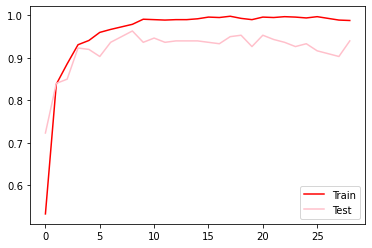

In [90]:
import matplotlib.pyplot as plt

acc=h.history["acc"]
val_acc=h.history["val_acc"]

epochs=np.arange(len(acc))

plt.plot(epochs,acc,c="red",label="Train")
plt.plot(epochs,val_acc,c="pink",label="Test")
plt.legend()